✅ Segmentasyon tamamlandı ve kaydedildi


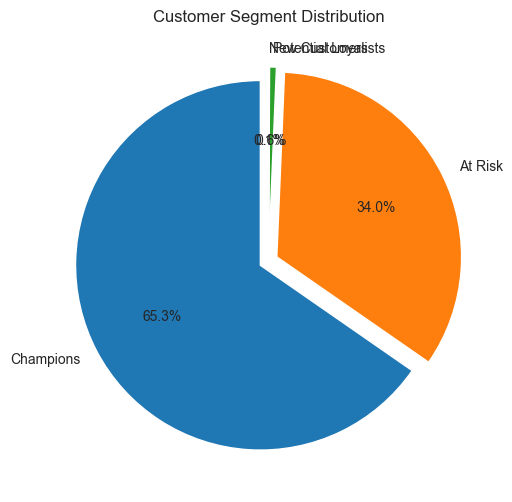

In [1]:
# %% [code]
# Müşteri Segmentasyonu
import sys
sys.path.append("..")
from src.models import segment_customers
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Segmentasyonu yap
segmented = segment_customers()

# Segment görselleştirme
if segmented is not None:
    # 3D Scatter plot
    fig = px.scatter_3d(
        segmented.reset_index(),
        x='Recency',
        y='Frequency',
        z='Monetary',
        color='Segment',
        title='Customer Segments',
        hover_name='CustomerID'
    )
    fig.write_html('../data/processed/segment_3d.html')
    
    # Segment dağılımı
    plt.figure(figsize=(10, 6))
    segmented['Segment'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        explode=[0.05, 0.05, 0.05, 0.05]
    )
    plt.title('Customer Segment Distribution')
    plt.ylabel('')
    plt.savefig('../data/processed/segment_pie.png')